In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [8]:
df_agg = pd.read_csv("../data/aggregate_results.csv")

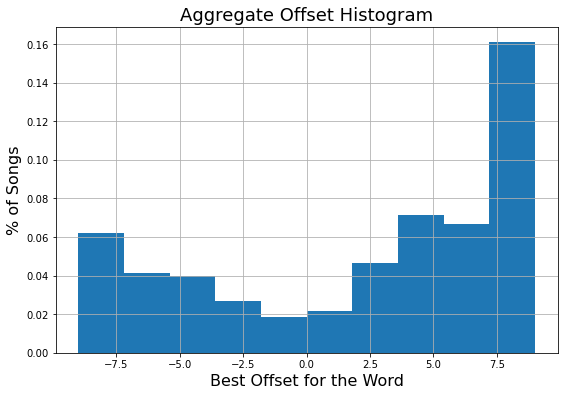

In [15]:
offset_hist = df_agg["offset"].hist(density=True, figsize=(9, 6))
offset_hist.set_title("Aggregate Offset Histogram", fontsize=18)
offset_hist.set_xlabel("Best Offset for the Word", fontsize=16)
offset_hist.set_ylabel("% of Songs", fontsize=16)
offset_hist.get_figure().savefig("offset_hist.pdf", bbox_inches="tight")

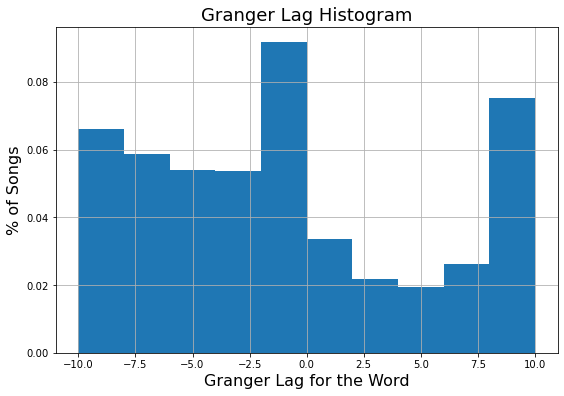

In [16]:
granger_hist = df_agg["granger_lag"].hist(density=True, figsize=(9, 6))
granger_hist.set_title("Granger Lag Histogram", fontsize=18)
granger_hist.set_xlabel("Granger Lag for the Word", fontsize=16)
granger_hist.set_ylabel("% of Songs", fontsize=16)
granger_hist.get_figure().savefig("granger_hist.pdf", bbox_inches="tight")

In [18]:
df_genre = pd.read_csv("../data/results_by_genre.csv")

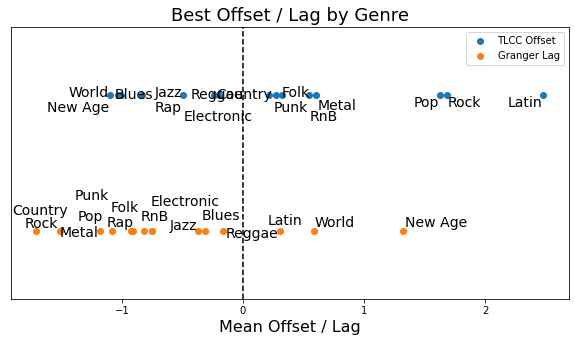

In [31]:
x = df_genre["mean_offset"]
y = [0.5 for _ in range(len(x))]
x2 = df_genre["granger_lag"]
y2 = [-0.5 for _ in range(len(x2))]
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, y, label="TLCC Offset")
ax.scatter(x2, y2, label="Granger Lag")
ax.legend()
texts = []
for index, row in df_genre.iterrows():
    texts.append(ax.text(row["mean_offset"], 0.5, row["genre"], fontsize=14))
    texts.append(ax.text(row["granger_lag"], -0.5, row["genre"], fontsize=14))

adjust_text(texts)
ax.set_yticks([])
ax.set_ylim(-1,1)
ax.plot((0,0), (-1, 1), linestyle="--", color="black")
ax.set_xlabel("Mean Offset / Lag", fontsize=16)
ax.set_title("Best Offset / Lag by Genre", fontsize=18)
fig.savefig("genre_plot.pdf", bbox_inches="tight")

In [ ]:
df_genre